# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание проекта.

По представленным статичтическим данным о платежеспособности клиентов банка необходимо провести исследование- влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Цель исследования — выяснить:

• Какие факторы больше всего влияют на стоимость квартиры

### Ход исследования

Данные о поведении пользователей (статистика о платёжеспособности клиентов)- в файле /datasets/real_estate_data.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в три этапа:

**Обзор данных.**

**Предобработка данных.**

** Расчет дополнительных параметров, необходимых для исследования**

• цены квадратного метра;

• день недели, месяц и год публикации объявления;

• этаж квартиры: варианты — первый, последний, другой;

• соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Исследовательский анализ данных.**

Зависимость цены квартиры :

• от площади, числа комнат, удалённости от центра

• от того, каком этаже расположена квартира: первом, последнем или другом.

• от даты размещения: дня недели, месяца и года.

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


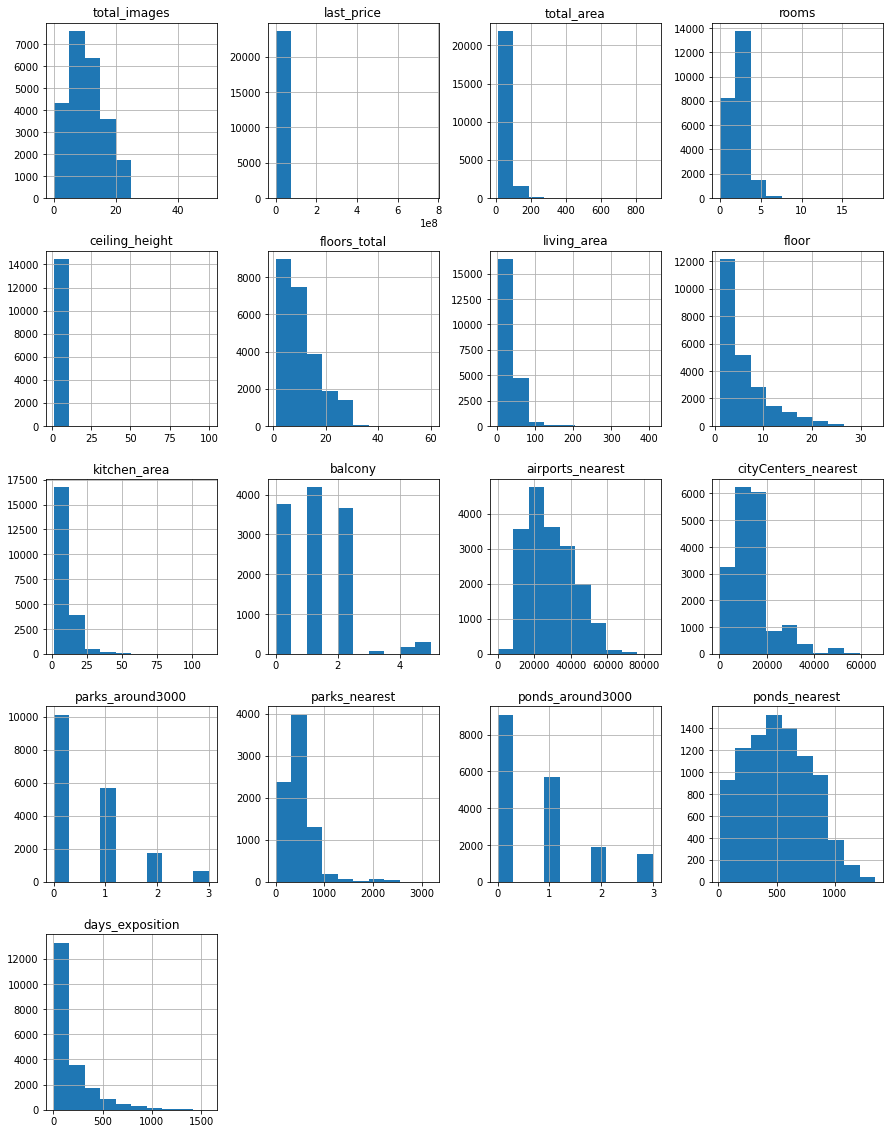

In [6]:
data.hist(figsize=(15, 20));

**Вывод**


Изучив общую информацию видим несколько проблем в исходных данных: в нескольких столбцах таблицы имеются пропущенные значения и тип данных float, заменим пропуски и изменим тип данных там, где это будет корректно. Причиной появления пропусков могут быть проблемы при выгрузке данных или ошибки при вводе данных.Также для удобства стоит привести столбец cityCenters_nearest к змеиному регистру.

### Предобработка данных

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Методом .rename изменили название cityCenters_nearest,привели к змеиному регистру.

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')


Убрали лишнюю информацию из столбца с датой размещения объявления first_day_exposition : привели дату к формату Year, month, day

Выведем количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data['balcony'] = data['balcony'].fillna(0)

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [12]:
data['ponds_around3000']= data['ponds_around3000'].fillna(0)


In [13]:
#data['floors_total'] = data['floors_total'].fillna(0)


In [14]:
data['floors_total'].isna().sum()

86

Так как пропусков в этом столбце мало, то можем оставить его без изменений , так как они не повлияют на наше исследование, но при необходимость всегда сможем удалить их используя метод dropna.


Заменили пропущенные значения в столбцах balcony, parks_around3000 и ponds_around3000 на 0 методом .fillna(), позволяющим заменить все пропущенные значения в нужном столбце датафрейма.Будем считать, что в радиусе 3 км нет парков и водоемов и если продавец не указал в объявлении количество балконов, будем считать что их тоже нет.

In [17]:
living_ratio = data['living_area'].median() / data['total_area'].median()

In [18]:
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)


Заменили оставшиеся пустые значения в жилой площади на медианное значение по всему датасету.

In [19]:
kitchen_ratio = data['kitchen_area'].median() / data['total_area'].median()

In [20]:
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)


Заменили оставшиеся пустые значения в площади кухни на медианное значение по всему датасету.

Посмотрим еще раз количество пропущенных значений, убедимся что пропуски исчезли там, где мы их заполняли.

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в days_exposition могут означает, что объявление еще не закрыто и смысла заполнять данный пропуск нет.
Пропуски в is_apartment относятся к аппартаментам, а нас интересуеют квартиры, поэтому не обращаем на них внимания.
Пропуски в airports_nearest,city_centers_nearest,parks_nearest и ponds_nearest могут быть вызваны тем, эти данные заполняются продавцом недвижимости, и если их нет, то можно предположить, что эти данные не является для продавца значимыми, увеличивающимии стоимость недвижимости, или у него отсутствует информация по ним.

Изменим тип данных в столбцах с количеством балконов,парков и прудов в радиусе 3 км и цены методом .astype(). Нам важно использовать правильные типы данных,иначе можно получить неожиданные результаты или ошибки.

In [22]:
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['last_price'] = data['last_price'].astype(int)
 


Изучим уникальные значения в столбце с названиями(locality_name) и устраните неявные дубликаты,если они есть.

In [23]:
len(data['locality_name'].unique())

365

In [24]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё','е')
len(data['locality_name'].unique())

331

Очиcтили все наши наименования от "ё" и привели к нижнему регистру - это помогло нам частично избавиться от "человеческого" фактора, так как один пользователь мог написал с ё, другой с е (либо в разных регистрах). Всего у нас в начале было 365 уникальных наименований, после данной операции осталось 331.

In [25]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [26]:
def locality_type(name):
    if pd.isna(name):
        return 'unknow'
    if 'санк' in name:
        return 'город'
    if any (x in name for x in ['городск','коттедж','котедж']):
        return 'ПГТ'
    if 'посел' in name:
        return 'поселок'
    if 'село' in name:
        return 'село'
    if 'дерев' in name:
        return 'деревня'
    if 'садов' in name:
        return 'садовое товарищество'
    else:
        return 'unknow'
       

In [27]:
data.insert(loc=15, column='locality_type', value=data['locality_name'].apply(locality_type))

Создали на основе столбца с наименованиями (locality_name), столбец с типами населенных пунктов (locality_type), например, "поселок", "город", "село" и т.п. - это поможет нам проводить группировку и делать выводы по типам населенных пунктов.

Очиcтим наши наименования от неявных дупликатов:

In [28]:
def cleaning_name_type(column):
    clean_names_column = column.str.replace("|".join(["поселок",   
                                                      "деревня",
                                                      "городского",
                                                      "типа",
                                                      "ПГТ",
                                                      "село",
                                                      "город",
                                                      "садовое",
                                                      "товарищество",
                                                      "коттеджный",
                                                      "котедж"
                                                     ]),"",regex=True).str.strip()
    return clean_names_column                                                     
                                                                                                   

In [29]:
data.insert(loc=15, column='locality_clean_name', value=cleaning_name_type(data['locality_name']))

В итоге получили новый столбец locality_clean_name без неявных дупликатов.

In [30]:
len(data['locality_clean_name'].unique())

317

После удаления получили 317 уникальных значений.

Посмотрим на значения в столбце ceiling_height:

In [31]:
data['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [32]:
data[data['ceiling_height']>3].sort_values('ceiling_height').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,locality_clean_name,locality_type,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,кронштадт,кронштадт,unknow,68923.0,50649.0,1,417.0,2,73.0,NaN
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,гатчина,гатчина,unknow,NaN,NaN,0,NaN,0,NaN,259.0
11285,0,1950000,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,...,луга,луга,unknow,NaN,NaN,0,NaN,0,NaN,18.0
14382,9,1700000,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,...,поселок новый свет,новый свет,поселок,NaN,NaN,0,NaN,0,NaN,206.0
18545,6,3750000,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,...,санкт-петербург,санкт-петербург,город,27054.0,8033.0,1,540.0,0,NaN,12.0
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,санкт-петербург,санкт-петербург,город,11647.0,13581.0,0,NaN,0,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,санкт-петербург,санкт-петербург,город,12016.0,13256.0,1,658.0,1,331.0,181.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,санкт-петербург,санкт-петербург,город,28981.0,10912.0,1,305.0,0,NaN,267.0
10773,8,3800000,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,поселок мурино,мурино,поселок,NaN,NaN,0,NaN,0,NaN,71.0
21824,20,2450000,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,...,городской поселок большая ижора,ской большая ижора,ПГТ,NaN,NaN,0,NaN,0,NaN,NaN


Видим, что там есть необоснованно большие (25,27,32 м)значения.Скорее всего это ошибка при вводе данных.Пока оставим их без изменений, так как их мало(около 6%) и на результаты исследования они не повлияют.Если понадобится можем их удалить.

In [33]:
len(data.query('ceiling_height>3'))/len(data)

0.06451749018945947

Очистим наш датафрейм от потолков < 1.2 м,  так как это аномальные значения.

In [78]:
data = data.loc[data['ceiling_height'] > 1.2]

**ВЫВОД :**

Вывод по предобработке данных:
Предположили, что пропуски в столбцах с количеством балконов и количеством парков и прудов в радиусе 3 км связаны с тем, что их по просту нет. Заменили их на 0 методом .fillna(), позволяющим заменить все пропущенные значения в нужном столбце датафрейма. Пропуски в жилой площади и площади кухни заменили медианой в соответствии с общей площадью. Методом .rename изменили название cityCenters_nearest и убрали лишнюю информацию из столбца с датой размещения объявления: привели дату к формату Year, month, day. Также изменили тип данных в столбцах с количеством балконов,парков и прудов в радиусе 3 км и цены методом .astype(). Избавились  от неявных дубликтов в столбце с населенными пунктами.

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем столбец со стоимостью квадратного метра (square_price). Для этого поделим цену квартиры на её общую площадь и приведем к целочисленному типу.

In [35]:
data['square_price'] = data['last_price'] / data['total_area']
data['square_price'] = data['square_price'].astype(int)


Добавим столбы с данными о дате, месяце и годе публикации объявления:

In [36]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Создадим функцию для заполнения нового столбца floor_type с типом этажа квартиры:

In [37]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Добавляем столбец с расстоянием до центра в км, округлим до целого значения:

In [38]:
data['city_centers_nearest_km'] =(data['city_centers_nearest']/1000).round()


### Проведите исследовательский анализ данных

Изучим общую площадь:

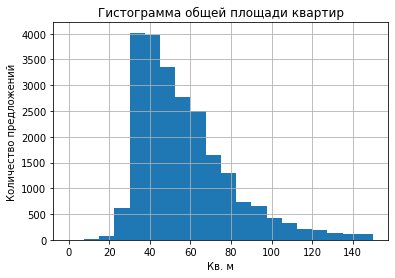

In [39]:
plt.hist(x=data['total_area'], bins=20, range=(0,150))
plt.xlabel('Кв. м')
plt.ylabel('Количество предложений')
plt.title('Гистограмма общей площади квартир')
plt.grid(True)
plt.show;


Построили гистограмму методом .hist(). Изучив ее мы видим, что большинство квартир имеют площаль около 35 кв м, чуть меньше квартир с площадью около 40 кв м.

Изучим жилую площадь:

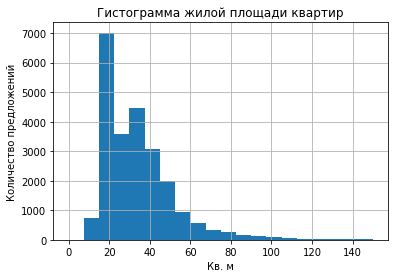

In [40]:
plt.hist(x=data['living_area'], bins=20, range=(0,150))
plt.xlabel('Кв. м')
plt.ylabel('Количество предложений')
plt.title('Гистограмма жилой площади квартир')
plt.grid(True)
plt.show;

Изучив гистограмму жилой площади, можно сказать, что больще всего предложений на квартиры с жилой площадью 20 кв.м (7000 предложений)
и около 35-39 кв.м(около 4500 предложений).

Изучим площадь кухни:

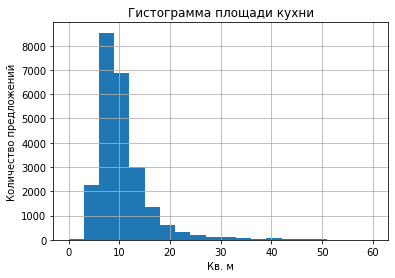

In [41]:
plt.hist(x=data['kitchen_area'], bins=20, range=(0,60))
plt.xlabel('Кв. м')
plt.ylabel('Количество предложений')
plt.title('Гистограмма площади кухни')
plt.grid(True)
plt.show;

Как видим на гистограмме больше всего предложений более 8000, на кухни с площадью 7-9 кв.м, также много предложений (около 7 тысяч) на кухни с площадью 10 кв.м

Построим гистограмму цены оъекта:

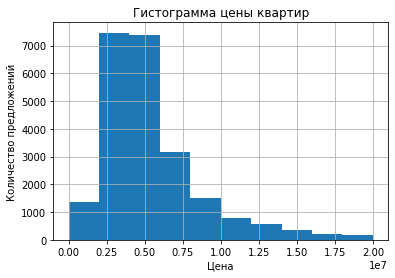

In [42]:
plt.hist(x=data['last_price'], bins=10, range=(0,20000000))
plt.xlabel('Цена')
plt.ylabel('Количество предложений')
plt.title('Гистограмма цены квартир')
plt.grid(True)
plt.show;

Ограничили значение цены квартиры в 20 млн. Изучив гистограмму можем сделать вывод, что цена большинства квартир находится в диапазоне 3-6 млн рублей, таких предложений более 7000.

Построит гистограмму количества комнат:

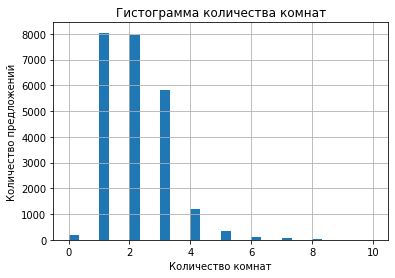

In [43]:
plt.hist(x=data['rooms'], bins=30, range=(0,10))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.title('Гистограмма количества комнат')
plt.grid(True)
plt.show;

По гистограммме количества комнат можно сделать делаем вывод, что большинство предложенных квартир однокомнатные: их чуть больше 8 тысяч, двухкомнатных квартир чуть меньше 8 тысяч, трёхкомнатных менее 6 тысяч.

Построим гистограмму высоты потолков:

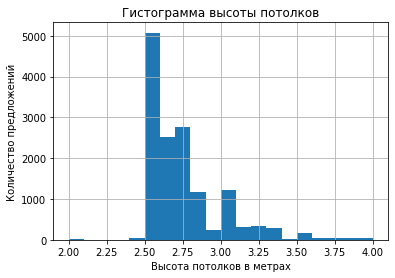

In [44]:
plt.hist(x=data['ceiling_height'], bins=20, range=(2,4))
plt.xlabel('Высота потолков в метрах')
plt.ylabel('Количество предложений')
plt.title('Гистограмма высоты потолков')
plt.grid(True)
plt.show;

Гистограмма высоты потолков показывает нам, что большинство квартир (около 12 тысяч) имеют высоту потолков примерно 2.6 м.

Гистограмма общего количества этажей квартир:

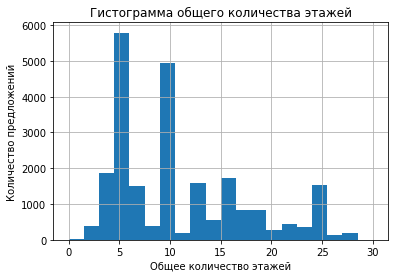

In [45]:
plt.hist(x=data['floors_total'], bins=20, range=(0,30))
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество предложений')
plt.title('Гистограмма общего количества этажей')
plt.grid(True)
plt.show;

По гистограмме видно, что большинство предложений (около 5.8 тысяч) приходятся на 5-ти этажные дома, на 10-ти этажные прихожится около 5 тысяч предложений.

Гистограмма по типам этажей квартир:

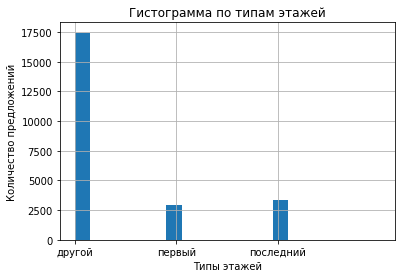

In [46]:
plt.hist(x=data['floor_type'], bins=20, range=(0,3))
plt.xlabel('Типы этажей')
plt.ylabel('Количество предложений')
plt.title('Гистограмма по типам этажей')
plt.grid(True)
plt.show;

Как мы видим, больше всего предложений ( 17.5 тысяч) находятся не на первом (чуть больше 2.5 тысяч) и не на последнем этажах(около 3 тысяч).

Рассмотри как распределились предложения в зависимости от этажа квартиры:

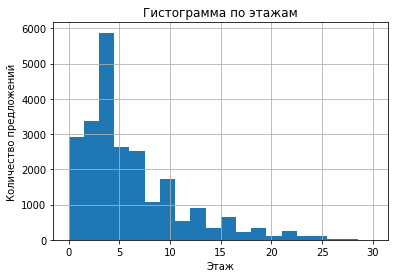

In [47]:
plt.hist(x=data['floor'], bins=20, range=(0,30))
plt.xlabel('Этаж')
plt.ylabel('Количество предложений')
plt.title('Гистограмма по этажам')
plt.grid(True)
plt.show;

Как видим по нашей гистограмме большинство квартир(около 6 тысяч) находится на 4 этаже.

Посмотрим расстояние до центра города в метрах:

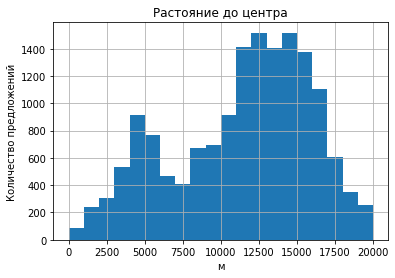

In [48]:
plt.hist(x=data['city_centers_nearest'], bins=20, range=(0,20000))
plt.xlabel('м')
plt.ylabel('Количество предложений')
plt.title('Растояние до центра')
plt.grid(True)
plt.show;

Как видим около 1500 предложенный квартир находятся в 12500 м и 14000 м от центра, около 1400 преддожений, находится на расстоянии от 11000 до 16000 м от центра. Есть,примерно, 900 квартир,находящихся в 4000 м от центра.

Исследуем расстояние до ближайшего аэропорта в метрах:

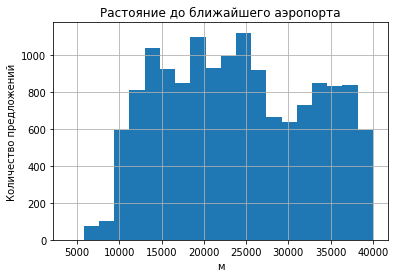

In [49]:
plt.hist(x=data['airports_nearest'], bins=20, range=(4000,40000))
plt.xlabel('м')
plt.ylabel('Количество предложений')
plt.title('Растояние до ближайшего аэропорта')
plt.grid(True)
plt.show;

По нашей гистограмме видно, что около 1200 квартир находятся на расстоянии 20 тысяч и 25 тысяч м до ближайшего аэропорта, чуть больше 1000 квартир на расстоянии 13-14 тысяч метров.

Расстояние до ближайшего парка в метрах:

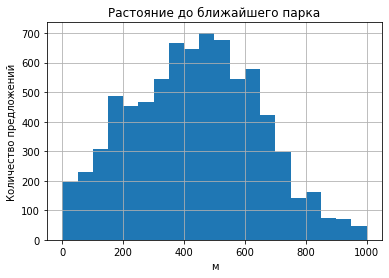

In [50]:
plt.hist(x=data['parks_nearest'], bins=20, range=(0,1000))
plt.xlabel('м')
plt.ylabel('Количество предложений')
plt.title('Растояние до ближайшего парка')
plt.grid(True)
plt.show;

Как видим на расстоянии от 300 до 500 м до ближайшего парка находится порядка 600-700 квартир, также большая доля квартир (около 500) находится на расстоянии от 100 до 300 м.




Проанализируем день и месяц публикации оъявлений:

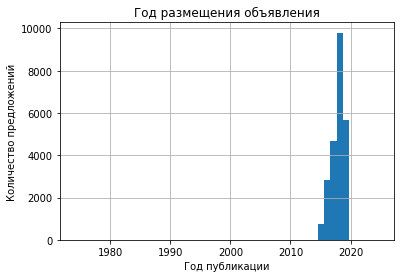

In [51]:
plt.hist(x=data['first_day_exposition'], bins=50, range=(1500,20000))                                                       
plt.xlabel('Год публикации')
plt.ylabel('Количество предложений')
plt.title('Год размещения объявления')
plt.grid(True)
plt.show;

In [52]:
data['first_day_exposition'].value_counts()

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-17      1
2017-01-06      1
2016-12-30      1
2016-07-06      1
2015-03-27      1
Name: first_day_exposition, Length: 1491, dtype: int64

С помощью гистограммы и метода value_counts, можно сказать, что большинсво объявлений было опубликованно в 2018 году (01 февраля 2018 года - 368 объявлений).

Посмотрим как распределились публикации объявлений по дням недели и месяцам:

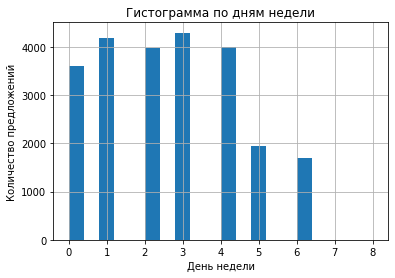

In [53]:
plt.hist(x=data['weekday'], bins=20, range=(0,8))
plt.xlabel('День недели')
plt.ylabel('Количество предложений')
plt.title('Гистограмма по дням недели')
plt.grid(True)
plt.show;

Как видим по нашей гистограмме больше всего публикаций (более 4000) приходится на четверг, чуть меньше на вторник, в среду и в пятницу около 4000 публикаций. Меньше всего приходится на выходные дни ( менее 2000 публикаций)

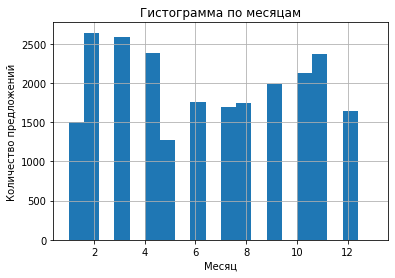

In [54]:
plt.hist(x=data['month'], bins=20, range=(1,13))
plt.xlabel('Месяц')
plt.ylabel('Количество предложений')
plt.title('Гистограмма по месяцам')
plt.grid(True)
plt.show;

Как видим самое большое количество предложений приходится на февраль и март (более 2500), затем идут апрель и ноябрь (около 2300),меньше всего объявлений приходится на май (около 1200).


**ВЫВОД :**

***Площадь:***
Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. 

***Стоимость:***
В основном стоимость квартир - порядка 5 миллионов рублей. Больше 20 миллионов вариантов мало.

***Комнаты:***
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом,поэтому не берем их в расчет, нас интересуют квартиры.

***Высота потолков:***
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров и выше (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра, так как их мало(около 6%) и на результаты исследования они не повлияют.

***Площадь кухни:***
Самые распространённые кухни - от 5 до 15 кв. метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

***Жилая площадь:***
Самые распространённые варианты с жилой площадью от 10 до 50 кв. метров. После 80 кв.метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

***Расстояние до цетра города и парка:***

Большинство квартир (от 1000-1500 объявлений) находится в 10-15 км от центра города, от 600-900 объявлений на растоянии от 3 до 6 км от центра.На расстоянии от 300 до 500 м до ближайшего парка находится порядка 600-700 квартир, также большая доля квартир (около 500) находится на расстоянии от 100 до 300 м.

***Проанализировали количество объявлений по дням недели и месяцам:***

Больше всего публикаций (более 4000) приходится на четверг, чуть меньше на вторник, в среду и в пятницу около 4000 публикаций. Меньше всего приходится на выходные дни ( менее 2000 публикаций).
Самое большое количество предложений приходится на февраль и март (более 2500), затем идут апрель и ноябрь (около 2300),меньше всего объявлений приходится на май (около 1200).

Посмотрим как быстро продавались квартиры:

Среднее: 180.88863436982163
Медиана: 95.0


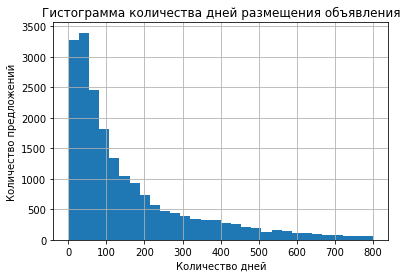

In [55]:

plt.hist(x=data['days_exposition'], bins=30, range=(1,800))
plt.xlabel('Количество дней')
plt.ylabel('Количество предложений')
plt.title('Гистограмма количества дней размещения объявления')
plt.grid(True)
plt.show;

print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())



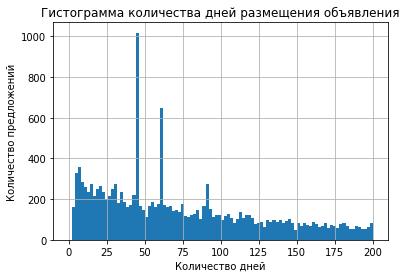

In [56]:
plt.hist(x=data['days_exposition'], bins=100, range=(0,200))
plt.xlabel('Количество дней')
plt.ylabel('Количество предложений')
plt.title('Гистограмма количества дней размещения объявления')
plt.grid(True)
plt.show;

In [57]:
data[data['days_exposition'] !=0]['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [58]:
data[data['days_exposition'] !=0]['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**ВЫВОД :**

Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления. Если обратиться к правила размещения объявлений в Яндекс Недвижимость, оказалось что именно после этих сроков объявление считается неактуальным и снимается автоматически. https://yandex.ru/support/realty/owner/home/add-ads-housing.html этим и объясняется наличие таких выбивающихся значений.
Исходя из метода describe, межквартильный размах - от 45 до 232 дней, объявлений со сроком более 700 дней уже очень мало.
Значит необоснованно быстрые продажи это срок в 45 дней и меньше, а необоснованно долгие - от 700 дней и выше. 


Изучим зависит ли цена от общей площади: 

Коэффициент корреляции: 0.6536750579657242


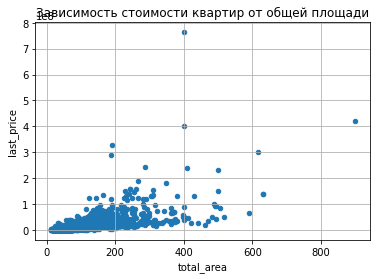

In [59]:
data.plot(x='total_area',y='last_price',kind='scatter',grid=True,title='Зависимость стоимости квартир от общей площади');             

print('Коэффициент корреляции:', data['total_area'].corr(data['last_price']))


Построили диаграмму рассеяния и посчитали коэффицент корреляции(чем он ближе к 1, тем теснее линейная связь), по ним можно сделать вывод, что зависимость действительно есть, чем больше площадь, тем выше цена квартиры.


Зависимость цены от жилой площади квартиры:


Коэффициент корреляции: 0.5858907700395659


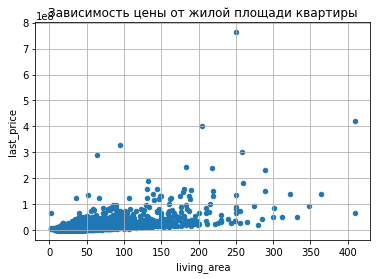

In [60]:
data.plot(x='living_area',y='last_price',kind='scatter',grid=True,title='Зависимость цены от жилой площади квартиры');
print('Коэффициент корреляции:', data['living_area'].corr(data['last_price']))

По диаграмме рассеяния и коэффициенту корреляции(0.59) видно, что связь есть, чем больше жилая площадь, тем выше цена. В квартирах с площадью больше 100 кв.м цена уже не так сильно меняется.

Зависимость цены от площади кухни:    

Коэффициент корреляции: 0.5141194369951924


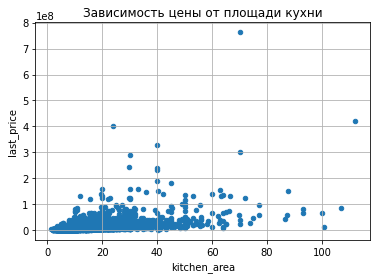

In [61]:
data.plot(x='kitchen_area',y='last_price',kind='scatter',grid=True,title='Зависимость цены от площади кухни');
print('Коэффициент корреляции:', data['kitchen_area'].corr(data['last_price']))

По диаграмме рассеяния и коэффициенту корреляции(0.51) видно, что зависимость есть только для кухонь с площадью до 30 кв.м, дальше цена практически не меняется.

Зависимость цены от количества комнат:

Коэффициент корреляции: 0.3633428499648948


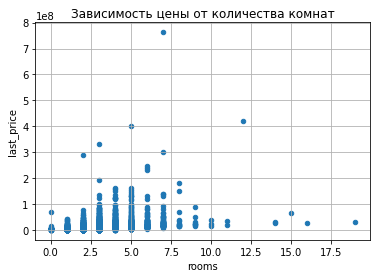

In [62]:
data.plot(x='rooms',y='last_price',kind='scatter',grid=True,title='Зависимость цены от количества комнат');
print('Коэффициент корреляции:', data['rooms'].corr(data['last_price']))

Корреляция в 0.36 говорит о наличии слабой связи между количеством комнат и стоимость, она гораздо меньше, чем в случае с площадью. По диаграмме видим возрастание цены в промежутке от 1 комнаты до 5.

Зависимость цены от этажа на котором она расположена:

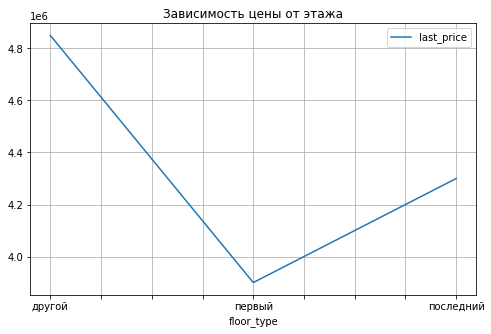

In [63]:
(
data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
.plot(figsize=(8,5),grid=True,title='Зависимость цены от этажа')
);


Медиана стоимости квартир по отношению с категорией этажа показывает, что расположенные на первом этаже квартиры имеют меньшую стоимость, чем на последнем, но квартиры, расположенные на других этажах стоят еще дороже.

Зависимость цены от даты размещения (день недели, месяц, год): 
для определения зависимости будем использовать сводные таблицы 

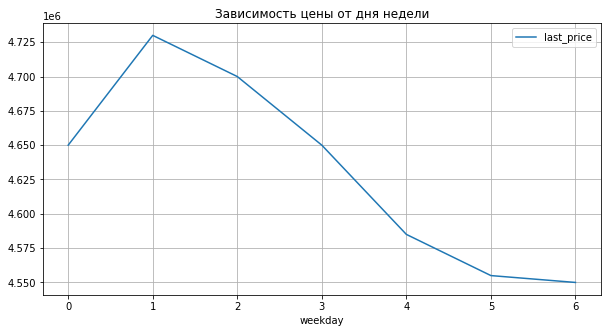

In [64]:
(
data.pivot_table(index='weekday', values='last_price', aggfunc='median')
.plot(figsize=(10,5),grid=True,title='Зависимость цены от дня недели')
);


Квартиры, опубликованные в выходные дни имеют меньшую стоимость, по сравнению с будними днями. Самая высокая стоимость наблюдается во вторник, самая низкая - в воскресенье.

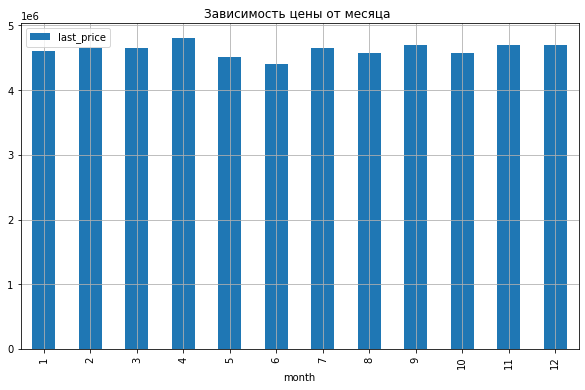

In [65]:
(
data.pivot_table(index='month', values='last_price', aggfunc='median')
.plot(kind='bar',figsize=(10,6),grid=True,title='Зависимость цены от месяца ')
);

В случае с месяцем публикации объявления самая низкая цена наблюдается в июне, самая высокая - в апреле. Но в целом различия в стоимости по месяцам минимальны.

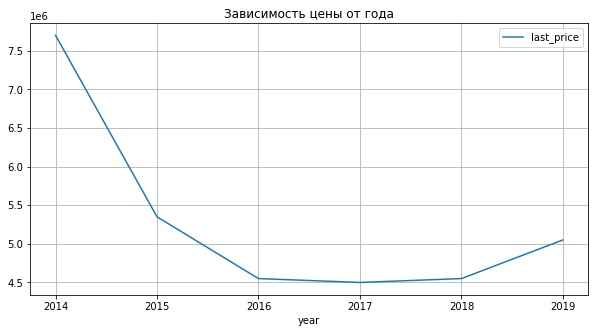

In [66]:
(
data.pivot_table(index='year', values='last_price', aggfunc='median')
.plot(figsize=(10,5),grid=True,title='Зависимость цены от года')
);

По графику зависимости цены от года публикации объяления видим, что квартиры, выставленные на продажу в 2014 году выделяются по сравнению с остальными годами, после 2014 до 2016 года идет резкое снижение средней стоимости квартир, два последующих года (с 2016 по 2018), различия минимальны и начиная с 2018 стоимость начала увеличиваться.

***ВЫВОД по результатам анализа различных факторов на цену квартиры:***

1.Существует линейная связь между общей площадью квартиры и ее ценой, чем она больше, тем цуна выше.

2.Влияние площади кухни на стоимость небольшое(есть зависимость только для кухонь с небольшой площадью до 20 кв.м).

3.Корреляция в 0.36 говорит о наличии слабой связи между количеством комнат и стоимость, она гораздо меньше, чем в случае с площадью (по диаграмме видим возрастание цены в промежутке от 1 комнаты до 5).

4.Расположенные на первом этаже квартиры имеют меньшую стоимость, чем на последнем, но квартиры, расположенные на других этажах стоят еще дороже.

5.Квартиры, опубликованные в выходные дни имеют меньшую стоимость, по сравнению с будними днями. Самая высокая стоимость наблюдается во вторник, самая низкая - в воскресенье.

6.В случае с месяцем публикации объявления самая низкая цена наблюдается в июне, самая высокая - в апреле. Но в целом различия в стоимости по месяцам минимальны.

7.Квартиры, выставленные на продажу в 2014 году выделяются по сравнению с остальными годами, после 2014 до 2016 года идет резкое снижение средней стоимости квартир, два последующих года (с 2016 по 2018), различия минимальны и начиная с 2018 стоимость начала увеличиваться.


Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:

In [67]:
data['locality_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [68]:
ten=['санкт-петербург','поселок мурино','поселок шушары','всеволожск','пушкин','колпино','поселок парголово','гатчина','деревня кудрово','выборг']

ten10=data.query('locality_name in @ten').pivot_table(index='locality_name', values='square_price',aggfunc='median')

ten10.sort_values(by='square_price', ascending=False)    
    

,square_price
locality_name,
санкт-петербург,104761.0
пушкин,100000.0
деревня кудрово,91860.0
поселок парголово,91642.0
поселок мурино,85878.0
поселок шушары,76876.0
колпино,74723.5
гатчина,67796.0
всеволожск,65789.0


Нашли 10 населённых пунктов с наибольшим числом объявлений методом .value_counts(). Cохранили результаты в список ten. Сделали срез данных нашей таблицы, по тем населенным пунктам, которые есть в списке с наибольшим числом объявлений и посчитали среднюю цену квадратного метра в этих населенных пунктах. В результате видим, что самая высокая цена квадратного метра в Санкт-Петербурге(104761 руб за кв.м), самая низкая - в Выборге(58158 руб за кв.м).


Выделим квартиры в Санкт-Петербурге и посмотрим как стоимость зависит от расстояния до центра города:

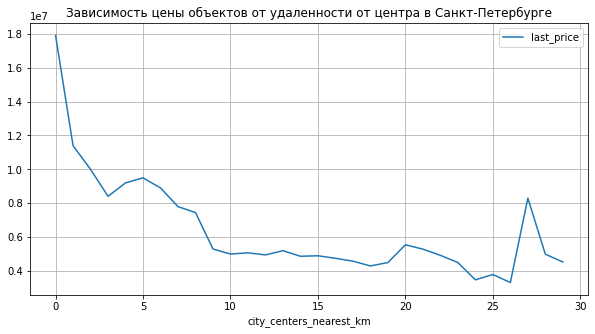

In [69]:
(
data.query('locality_name == "санкт-петербург"').pivot_table(index='city_centers_nearest_km',values='last_price',aggfunc='median')
.plot(title='Зависимость цены объектов от удаленности от центра в Санкт-Петербурге', grid=True, figsize=(10,5))
);    

Построли график зависимости цены объектов от удаленности от центра в городе Санкт-Петербург. Изучив его можем сделать вывод, что чем ближе квартира располагается к центру, тем выше ее стоимость, для квартир, расположенных дальше 8 км, цена начинает снижаться.

### Общий вывод

 Чтобы получить корректные ответы на вопросы была проведена предобработка исходного датафрейма: заполнение пропусков и изменение типов данных в нужных нам столбцах(пропуски в столбцах с количеством балконов и количеством парков и прудов в радиусе 3 км заменили на 0 методом .fillna().NaN в столбцах с высотой потолков и количеством этажей заменили медианой, а в жилой площади и площади кухни медианой в соответствии с общей площадью,убрали лишнюю информацию из столбца с датой размещения объявления.Избавились  от неявных дубликтов в столбце с населенными пунктами.

После исследовательского анализа данный увидели:
Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается,стоимость квартир - порядка 5 миллионов рублей. В основном квартиры состоят из 1, 2 и 3 комнат,есть небольшая доля 4-комнатных квартир.Большинство вариантов имеют высоту потолков от 2,5 до 3 метров.Жилой площадь от 10 до 50 кв. м, кухни - от 5 до 15 кв.м. Большинство квартир (от 1000-1500 объявлений) находится в 10-15 км от центра города, от 600-900 объявлений на растоянии от 3 до 6 км от центра.
     
Изучив предоставленные данные мы выяснили какие факторы больше всего влияют на стоимость квартиры:

***Срок продажи квартиры***

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

***Факторы, влияющие на стоимость***

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.Влияние площади кухни на стоимость небольшое(есть зависимость только для кухонь с небольшой площадью до 20 кв.м).
Расположенные на первом этаже квартиры имеют меньшую стоимость, чем на последнем, но квартиры, расположенные на других этажах стоят еще дороже.
Квартиры, опубликованные в выходные дни имеют меньшую стоимость, по сравнению с будними днями,различия в стоимости по месяцам минимальны.

***Стоимость квадратного метра в топ-10 населённых пунктов***

Дороже всего квадратный метр в Санкт-Петербурге - 104761 руб.кв.м,
дешевле всего квадратный метр в Выборге - 58158 руб.кв.м.
И чем ближе квартира располагается к центру, тем выше ее стоимость.

Таким образом можно сделать вывод, что наибольшее влияние на цену оказывает общая площадь квартиры и ее приближенность к центру, квартиры расположенные не более 8 км от центра стоят дороже прочих.